In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [81]:
data = pd.read_csv("merged_olist_dataset.csv")

In [82]:
data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_purchase_date,item_revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,2017-09-13,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,2017-04-26,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,2018-01-14,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,2018-08-08,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,2017-02-04,199.90


In [83]:
data.shape

(112650, 24)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   customer_id                    112650 non-null  object 
 8   order_status                   112650 non-null  object 
 9   order_purchase_timestamp       112650 non-null  object 
 10  order_approved_at              112635 non-null  object 
 11  order_delivered_carrier_date   111456 non-null  object 
 12  order_delivered_customer_date 

In [85]:
data.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,item_revenue
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000,112650.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546,120.653739
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268,183.633928
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,0.850000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,39.900000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000,74.990000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,134.900000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,6735.000000


Exploratory Data Analysis

In [86]:
data.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
order_purchase_date                 0
item_revenue                        0
dtype: int64

In [87]:
data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'order_purchase_date',
       'item_revenue'],
      dtype='object')

In [88]:
data['order_approved_at'] = data['order_approved_at'].fillna(data['order_purchase_timestamp'])
data['order_delivered_carrier_date'] = data['order_delivered_carrier_date'].fillna(method='ffill')
data['order_delivered_customer_date'] = data['order_delivered_customer_date'].fillna(method='ffill')
data['product_category_name'] = data['product_category_name'].fillna("Unknown")
data = data.dropna(subset = ['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_11036\3234497894.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['order_delivered_carrier_date'] = data['order_delivered_carrier_date'].fillna(method='ffill')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11036\3234497894.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['order_delivered_customer_date'] = data['order_delivered_customer_date'].fillna(method='ffill')


In [89]:
data.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
order_purchase_date              0
item_revenue                     0
dtype: int64

In [90]:
data.duplicated().sum()

np.int64(0)

Feature Engineering

In [160]:
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

daily_revenue = data.groupby('order_purchase_date')['item_revenue'].sum().reset_index()
daily_revenue.columns = ['date', 'total_revenue']
daily_revenue

,date,total_revenue
0,2016-09-04,72.89
1,2016-09-05,59.50
2,2016-09-15,134.97
3,2016-10-02,100.00
4,2016-10-03,463.48
...,...,...
611,2018-08-26,8010.81
612,2018-08-27,5315.92
613,2018-08-28,3673.91
614,2018-08-29,1546.04


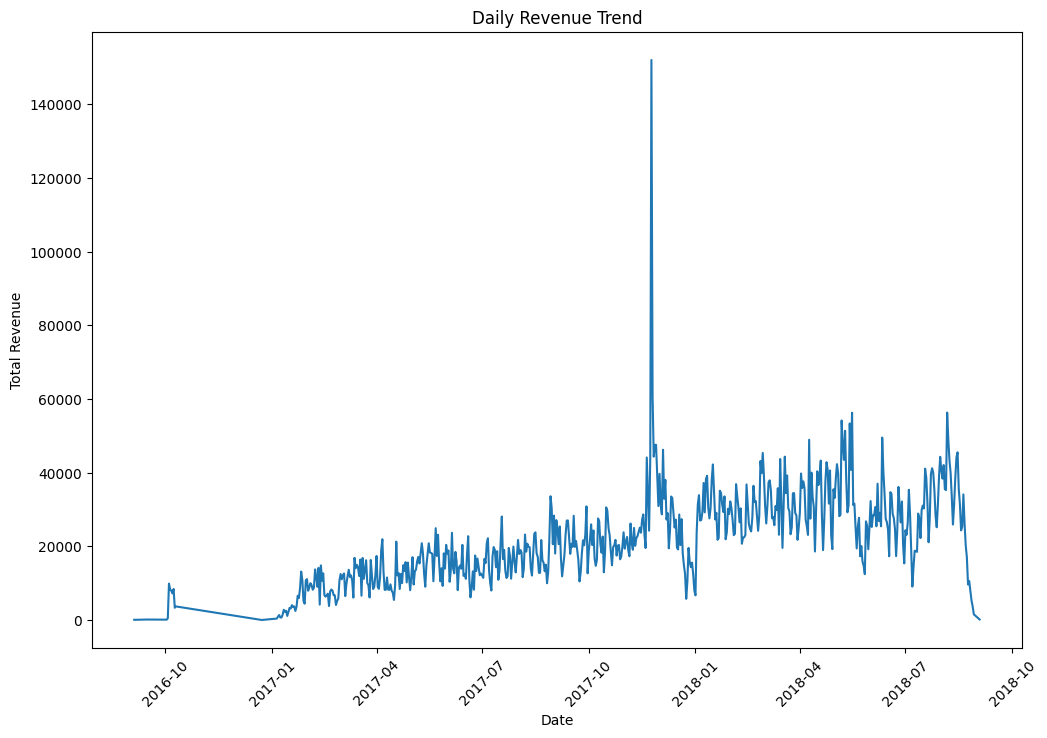

In [161]:
plt.figure(figsize=(12,8))
plt.plot(daily_revenue['date'], daily_revenue['total_revenue'])

plt.xlabel("Date")
plt.ylabel('Total Revenue')
plt.title('Daily Revenue Trend')
plt.xticks(rotation=45)
plt.show()

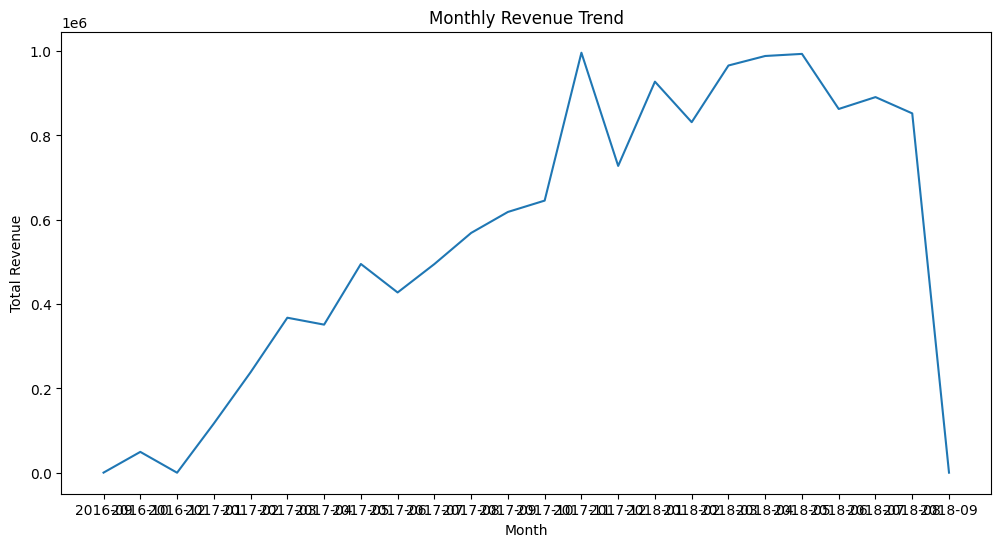

In [162]:
data['order_purchase_date'] = pd.to_datetime(data['order_purchase_date'])
data['year_month'] = data['order_purchase_date'].dt.to_period('M').astype(str)
monthly_revenue = data.groupby('year_month')['item_revenue'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_revenue['year_month'], monthly_revenue['item_revenue'])

plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.show()

In [163]:
category_revenue = data.groupby('product_category_name')['item_revenue'].sum().reset_index()

top_10 = category_revenue.sort_values(by='item_revenue',ascending=False ).head(10)
print(top_10)

     product_category_name  item_revenue
11            beleza_saude    1258681.34
66      relogios_presentes    1205005.68
13         cama_mesa_banho    1036988.68
32           esporte_lazer     988048.97
44  informatica_acessorios     911954.32
54        moveis_decoracao     729762.49
26              cool_stuff     635290.85
72   utilidades_domesticas     632248.66
8               automotivo     592720.11
40      ferramentas_jardim     485256.46


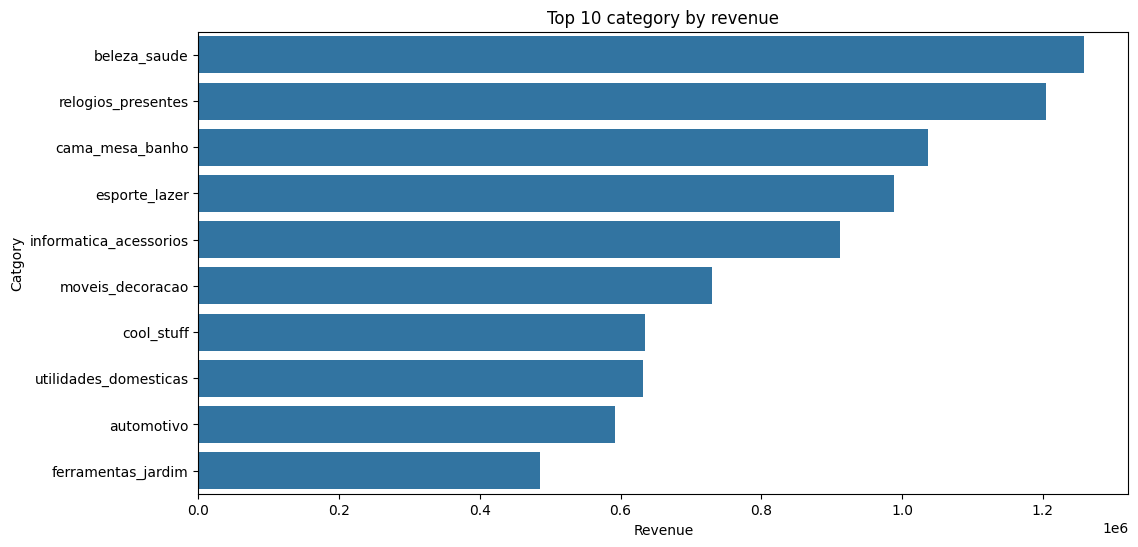

In [164]:
plt.figure(figsize=(12,6))
sns.barplot(x='item_revenue', y='product_category_name', data=top_10)
plt.title("Top 10 category by revenue")
plt.xlabel('Revenue')
plt.ylabel('Catgory')
plt.show()

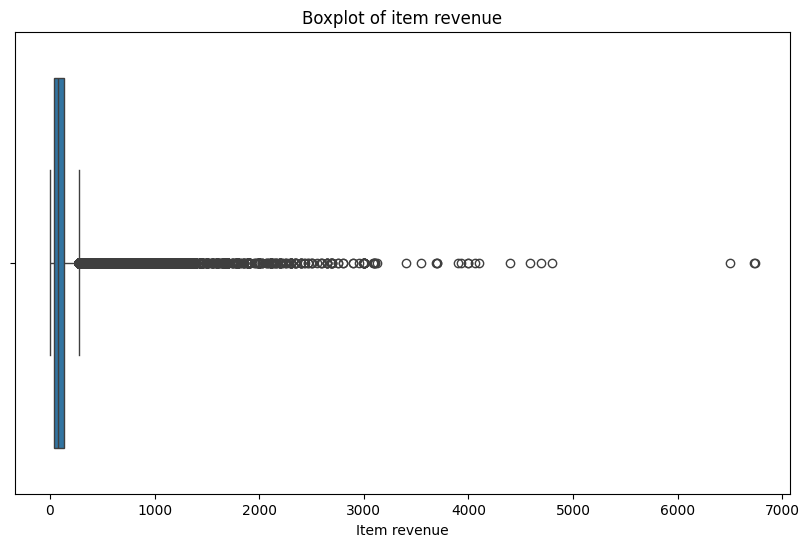

In [165]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['item_revenue'])
plt.title('Boxplot of item revenue')
plt.xlabel('Item revenue')
plt.show()

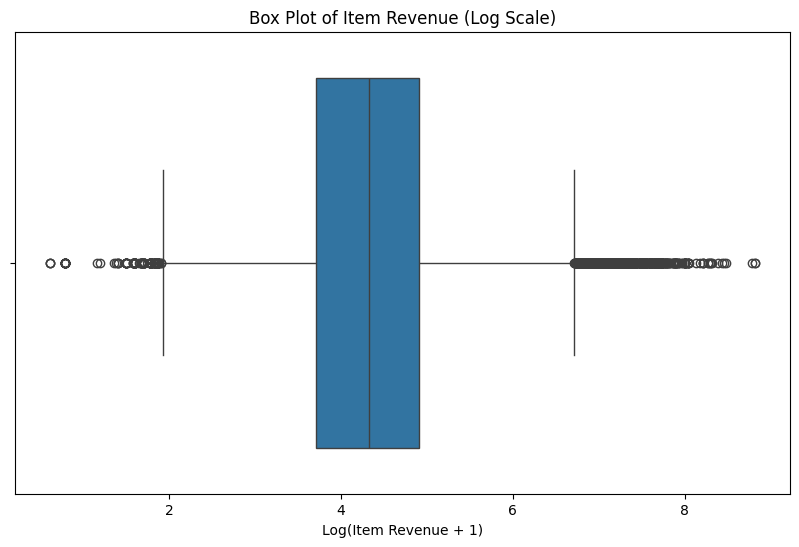

In [166]:
plt.figure(figsize=(10,6))
sns.boxplot(x=np.log1p(data['item_revenue']))  # log1p to handle zeros
plt.title("Box Plot of Item Revenue (Log Scale)")
plt.xlabel("Log(Item Revenue + 1)")
plt.show()


In [167]:
negative_revenue = data[data['item_revenue'] < 0]
print(negative_revenue)


Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, order_purchase_date, item_revenue, year_month]
Index: []

[0 rows x 25 columns]


In [168]:
daily_revenue = data.groupby('order_purchase_date')['item_revenue'].sum().reset_index()
daily_revenue.columns = ['date', 'total_revenue']


In [169]:
daily_revenue['date'] = pd.to_datetime(daily_revenue['date'])
daily_revenue.set_index('date', inplace=True)

daily_revenue = daily_revenue.sort_index()



In [101]:
'''daily_revenue = data.groupby('order_purchase_date').agg(
    total_revenue=('price', 'sum'),
    avg_price=('price', 'mean'),
    total_orders=('order_id', 'nunique'),
    total_items=('order_item_id', 'count'),
    total_weight=('product_weight_g', 'sum')
)'''


"daily_revenue = data.groupby('order_purchase_date').agg(\n    total_revenue=('price', 'sum'),\n    avg_price=('price', 'mean'),\n    total_orders=('order_id', 'nunique'),\n    total_items=('order_item_id', 'count'),\n    total_weight=('product_weight_g', 'sum')\n)"

In [170]:
daily_revenue['day'] = daily_revenue.index.day
daily_revenue['month'] = daily_revenue.index.month
daily_revenue['year'] = daily_revenue.index.year
daily_revenue['dayofweek'] = daily_revenue.index.dayofweek  # 0=Monday, 6=Sunday
daily_revenue['is_weekend'] = (daily_revenue['dayofweek'] >= 5).astype(int)


In [171]:
daily_revenue['revenue_lag_1'] = daily_revenue['total_revenue'].shift(1)
daily_revenue['revenue_lag_7'] = daily_revenue['total_revenue'].shift(7)  # weekly trend
daily_revenue = daily_revenue.dropna()


we are predicting the total revenue per day , not for per product . so factors affecting daily revenue are different then single item revenue.
Daily Revenue behaves like time series so it follows patterns like weekday, weekends, seasonal peaks, holidays etc
if we use other features like the price , weight , category they will just behave like noise. 
Daily revenue is sum of thousands of orders, each with different prices, categories, weights.
1. These features don’t have a meaningful daily pattern.
2. Adding them confuses the model instead of helping it.
Daily revenue depends on user activity and not on product properties, for eg people buy more on holidays , weekends , festival season, paydays so these effects are easily captures by month , day , dayof week , lag features .
Product properties like weight or length don’t influence how much the whole country buys that day.

In [172]:
from sklearn.model_selection import train_test_split

X = daily_revenue.drop('total_revenue', axis=1)
y = daily_revenue['total_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # shuffle=False for time series


In [173]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse**0.5

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)


MSE: 69919486.63330938
MAE: 6150.1681663934405
RMSE: 8361.787287016417


Extreme sales days (like promotions, flash sales, or holidays) make your model “confused” because they deviate a lot from usual patterns.


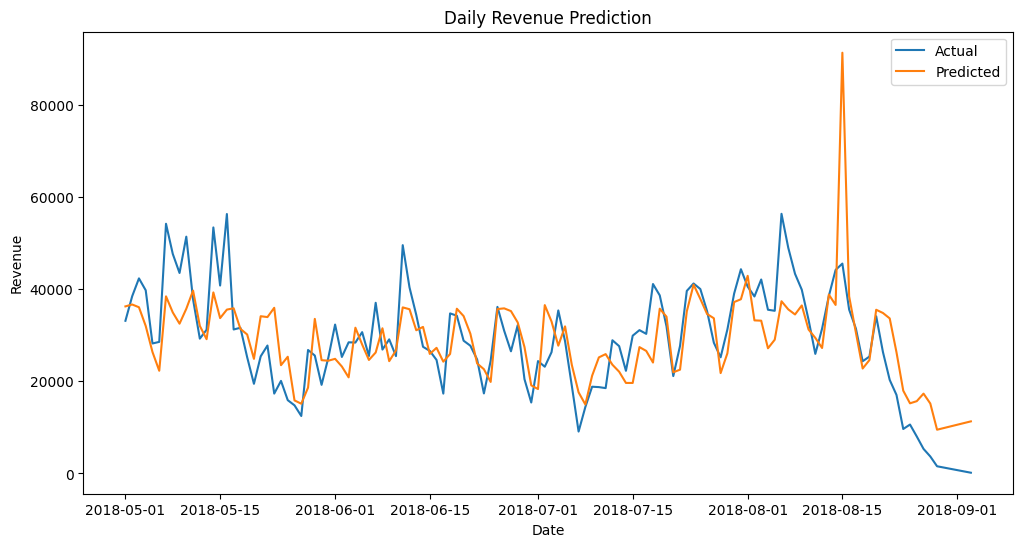

In [174]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Daily Revenue Prediction')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


Used Capping for outliers ! 

In [175]:
daily_revenue_copy = daily_revenue.copy()

numeric_cols = ['total_revenue', 'revenue_lag_1', 'revenue_lag_7']

for col in numeric_cols:
    q = daily_revenue_copy[col].quantile([0.01, 0.99])
    lower = q.iloc[0]  # 1st percentile
    upper = q.iloc[1]  # 99th percentile
    daily_revenue_copy[col] = daily_revenue_copy[col].clip(lower, upper)

# Split X and y
y_capped = daily_revenue_copy['total_revenue']
X_capped = daily_revenue_copy.drop('total_revenue', axis=1)

# Check
print(X_capped.describe())
print(y_capped.describe())

              day       month         year   dayofweek  is_weekend  \
count  609.000000  609.000000   609.000000  609.000000  609.000000   
mean    15.679803    5.801314  2017.387521    3.001642    0.285714   
std      8.735944    3.203863     0.507421    2.003697    0.452125   
min      1.000000    1.000000  2016.000000    0.000000    0.000000   
25%      8.000000    3.000000  2017.000000    1.000000    0.000000   
50%     16.000000    6.000000  2017.000000    3.000000    0.000000   
75%     23.000000    8.000000  2018.000000    5.000000    1.000000   
max     31.000000   12.000000  2018.000000    6.000000    1.000000   

       revenue_lag_1  revenue_lag_7  
count     609.000000     609.000000  
mean    21803.206688   21753.498938  
std     11142.491861   11223.124420  
min      1358.537600     480.304800  
25%     13093.650000   13093.650000  
50%     20377.580000   20377.580000  
75%     29086.080000   29086.080000  
max     51221.662800   51221.662800  
count      609.000000
mean 

In [176]:
x_capped_train, x_capped_test, y_capped_train, y_capped_test = train_test_split(X_capped, y_capped, test_size=0.2, random_state=42, shuffle=False)


In [177]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(x_capped_train, y_capped_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [178]:
# Predict
y_pred_capped = rf.predict(x_capped_test)

# Evaluate
mse = mean_squared_error(y_capped_test, y_pred_capped)
mae = mean_absolute_error(y_capped_test, y_pred_capped)
rmse = root_mean_squared_error(y_capped_test, y_pred_capped)

In [179]:
print(f"==== Random Forest Metrics (Capped Data) ====")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


==== Random Forest Metrics (Capped Data) ====
MSE: 51402743.228599176
MAE: 5787.183955047868
RMSE: 7169.570644648058


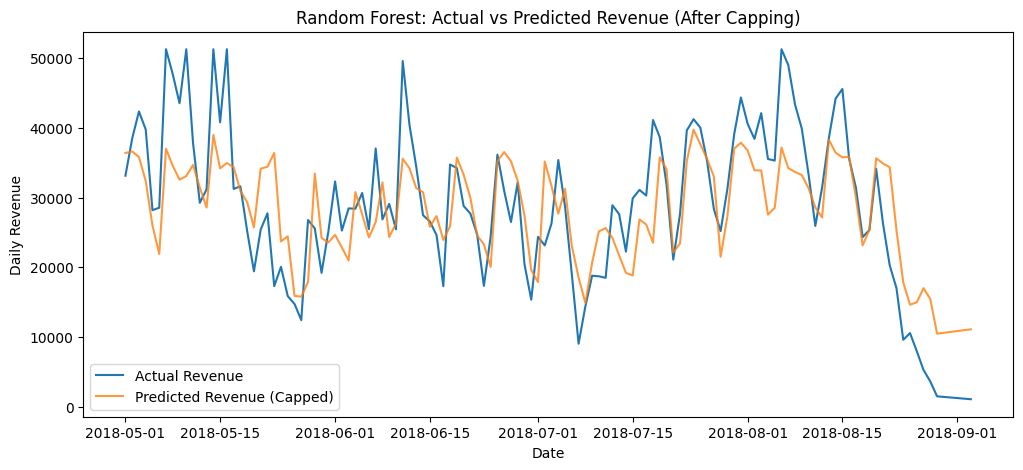

In [180]:
plt.figure(figsize=(12,5))
plt.plot(y_capped_test.index, y_capped_test, label='Actual Revenue')
plt.plot(y_capped_test.index, y_pred_capped, label='Predicted Revenue (Capped)', alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Daily Revenue')
plt.title('Random Forest: Actual vs Predicted Revenue (After Capping)')
plt.legend()
plt.show()

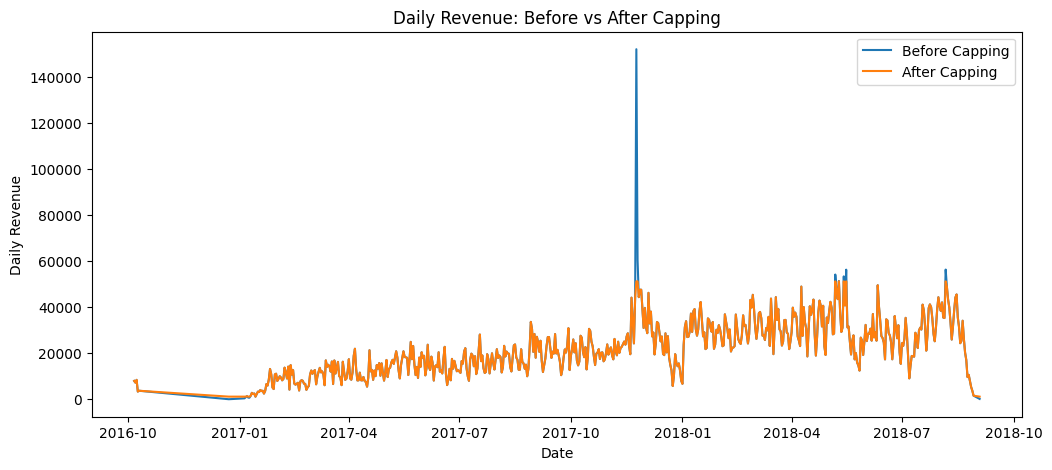

In [114]:

plt.figure(figsize=(12,5))
plt.plot(daily_revenue.index, daily_revenue['total_revenue'], label='Before Capping')
plt.plot(daily_revenue_copy.index, daily_revenue_copy['total_revenue'], label='After Capping')
plt.xlabel('Date')
plt.ylabel('Daily Revenue')
plt.title('Daily Revenue: Before vs After Capping')
plt.legend()
plt.show()


In [115]:
import pickle

In [116]:
#random forest model 1 
with open("model_1.pkl", "wb") as f:
    pickle.dump(model, f)

#random forest model 2
with open("model_2_capped.pkl", "wb") as f:
    pickle.dump(rf, f)

print("regressor model saved !")

regressor model saved !


In [ ]:
#classifier model 
high_threshold = daily_revenue["total_revenue"].quantile(0.80)
low_threshold = daily_revenue["total_revenue"].quantile(0.20)


'≥ 80,000 → High\n≤ 25,000 → Low\nin between → Medium'

In [152]:
print("Low threshold (20th percentile):", low_threshold)
print("High threshold (80th percentile):", high_threshold)


Low threshold (20th percentile): 11862.236
High threshold (80th percentile): 31136.202


In [140]:
def classify_sales(rev):
    if rev >= high_threshold:
        return 2    # High sales day
    elif rev <= low_threshold:
        return 0    # Low sales day
    else:
        return 1    # Medium sales day

daily_revenue["sales_label"] = daily_revenue["total_revenue"].apply(classify_sales)


In [141]:
daily_revenue['sales_label'].value_counts()


sales_label
1    365
0    122
2    122
Name: count, dtype: int64

In [142]:
X_2 = daily_revenue.drop(["sales_label", "total_revenue"], axis=1)
Y_2 = daily_revenue["sales_label"]

In [143]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_2, Y_2, test_size=0.2, random_state=42
)

In [144]:
from sklearn.ensemble import RandomForestClassifier

sales_classifier = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

sales_classifier.fit(Xc_train, yc_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [145]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = sales_classifier.predict(Xc_test)

print(confusion_matrix(yc_test, y_pred))
print(classification_report(yc_test, y_pred))


[[19  9  0]
 [10 58 10]
 [ 0  3 13]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67        28
           1       0.83      0.74      0.78        78
           2       0.57      0.81      0.67        16

    accuracy                           0.74       122
   macro avg       0.68      0.74      0.71       122
weighted avg       0.75      0.74      0.74       122



In [123]:
sales_classifier.feature_names_in_


array(['day', 'month', 'year', 'dayofweek', 'is_weekend', 'revenue_lag_1',
       'revenue_lag_7'], dtype=object)

In [149]:
one_day_input = pd.DataFrame([{
    "day": 12,             # example date
    "month": 5,            # May
    "year": 2024,
    "dayofweek": 2,        # Tuesday
    "is_weekend": 0,       # weekday
    "revenue_lag_1": 32000,   # yesterday's revenue
    "revenue_lag_7": 28000    # revenue 7 days ago
}])

predicted_revenue = model.predict(one_day_input)[0]
print(f"Predicted Total Revenue: {predicted_revenue:.0f}")

Predicted Total Revenue: 35209


In [150]:
prediction = sales_classifier.predict(one_day_input)
prediction

array([2])

In [151]:
classify_sales(predicted_revenue)

2

In [125]:

with open("sales_classifier.pkl", "wb") as f:
    pickle.dump(sales_classifier, f)